In [4]:
## load useful libraries
suppressWarnings(suppressPackageStartupMessages(library(rhdf5)))
suppressWarnings(suppressPackageStartupMessages(library(qvalue)))
suppressWarnings(suppressPackageStartupMessages(library(dplyr)))
suppressWarnings(suppressPackageStartupMessages(library(tidyverse)))
suppressWarnings(suppressPackageStartupMessages(library(ggbeeswarm)))
suppressWarnings(suppressPackageStartupMessages(library(scater)))
suppressWarnings(suppressPackageStartupMessages(library(SingleCellExperiment)))
suppressWarnings(suppressPackageStartupMessages(library(edgeR)))
# suppressWarnings(suppressPackageStartupMessages(library(scQTLs)))
suppressWarnings(suppressPackageStartupMessages(library(limma)))
suppressWarnings(suppressPackageStartupMessages(library(cowplot)))
suppressWarnings(suppressPackageStartupMessages(library(RColorBrewer)))

In [5]:
vd_filename <- "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_endodiff/data/variance_decomposition/sce_merged_qc_filt_mnn_correct_slalom_exprs_20180310.var_decomp.5000cells.seed0.tsv"

In [6]:
vd_filename <- "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_endodiff/data/variance_decomposition/sce_merged_afterqc_filt_allexpts_exprs_20180618.var_decomp.5000cells.15experiments.seed0.tsv"

In [7]:
vd <- read.csv(vd_filename, row.names = 1)
head(vd[,1:4])

,donor_long_id,experiment,day,residual
,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000153982_GDPD1,0.007621973,6.985467e-04,0.024658028,0.9670215
ENSG00000154040_CABYR,0.007234918,6.736626e-03,0.012741225,0.9732872
ENSG00000154080_CHST9,0.002848415,3.307531e-03,0.031483258,0.9623608
ENSG00000154096_THY1,0.028380478,6.486298e-02,0.324306667,0.5824499
ENSG00000154102_C16orf74,0.018645116,3.220612e-05,0.002999832,0.9783228
ENSG00000154134_ROBO3,0.012450225,5.980282e-03,0.004190336,0.9773792


In [5]:
tail(vd)

,donor_long_id,experiment,day,residual,variance,mean,cv,overdispersion,overdispersion_rank,mean_rank
ENSG00000184056_VPS33B,0.004241917,0.0023139089,0.001232832,0.9922113,3.025964,-0.03324215,-52.32903,-0.006428290,0.52,0.44
ENSG00000184154_LRTOMT,0.005248862,0.0001294004,0.004131674,0.9904901,2.896726,0.00959789,177.32827,0.214179126,0.82,0.90
ENSG00000184162_NR2C2AP,0.004500913,0.0108881056,0.052731430,0.9318796,4.621447,-0.13086050,-16.42784,0.006754969,0.64,0.02
ENSG00000184164_CRELD2,0.007689294,0.0240217661,0.034997289,0.9332917,4.049639,-0.02824695,-71.24208,0.399884842,0.88,0.46
ENSG00000184178_SCFD2,0.003395342,0.0208658356,0.068396190,0.9073426,2.367516,-0.09501825,-16.19345,0.189260756,0.78,0.10
ENSG00000184182_UBE2F,0.004293370,0.0232149224,0.013685825,0.9588059,2.178280,-0.05092184,-28.98363,-1.328807230,0.10,0.30


In [6]:
nrow(vd)

[1] 4546

In [7]:
vd = vd[!(is.na(vd$donor_long_id)),]

In [8]:
nrow(vd)

[1] 4546

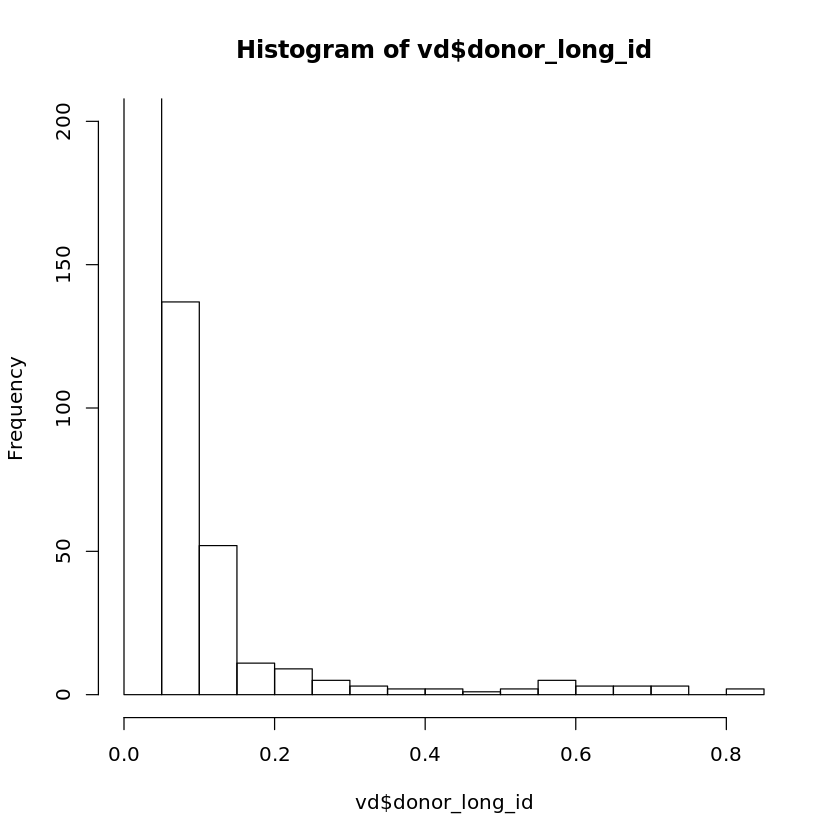

In [9]:
hist(vd$donor_long_id, ylim = c(0,200))

In [10]:
nrow(vd[vd$donor_long_id > 0.05,])
nrow(vd[vd$donor_long_id > 0.1,])
nrow(vd[vd$donor_long_id > 0.2,])
nrow(vd[vd$donor_long_id > 0.3,])
nrow(vd[vd$donor_long_id > 0.4,])
nrow(vd[vd$donor_long_id > 0.5,])
nrow(vd[vd$donor_long_id > 0.6,])
nrow(vd[vd$donor_long_id > 0.7,])
nrow(vd[vd$donor_long_id > 0.8,])
nrow(vd[vd$donor_long_id > 0.9,])

[1] 240

[1] 103

[1] 40

[1] 26

[1] 21

[1] 18

[1] 11

[1] 5

[1] 2

[1] 0

In [11]:
nrow(vd[vd$day > 0.05,])
nrow(vd[vd$day > 0.1,])
nrow(vd[vd$day > 0.2,])
nrow(vd[vd$day > 0.3,])
nrow(vd[vd$day > 0.4,])
nrow(vd[vd$day > 0.5,])
nrow(vd[vd$day > 0.6,])
nrow(vd[vd$day > 0.7,])
nrow(vd[vd$day > 0.8,])
nrow(vd[vd$day > 0.9,])

[1] 1687

[1] 853

[1] 282

[1] 103

[1] 32

[1] 8

[1] 1

[1] 0

[1] 0

[1] 0

In [12]:
nrow(vd[vd$experiment > 0.05,])
nrow(vd[vd$experiment > 0.1,])
nrow(vd[vd$experiment > 0.2,])
nrow(vd[vd$experiment > 0.3,])
nrow(vd[vd$experiment > 0.4,])
nrow(vd[vd$experiment > 0.5,])
nrow(vd[vd$experiment > 0.6,])
nrow(vd[vd$experiment > 0.7,])
nrow(vd[vd$experiment > 0.8,])
nrow(vd[vd$experiment > 0.9,])
nrow(vd[vd$experiment > 1,])

[1] 448

[1] 40

[1] 2

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

In [13]:
options(repr.plot.width = 7, repr.plot.height = 7)
bars <- c(nrow(vd[vd$day > 0.1 & vd$day < 0.2,]), nrow(vd[vd$day > 0.2& vd$day < 0.3,]), 
          nrow(vd[vd$day > 0.3 & vd$day < 0.4,]),nrow(vd[vd$day > 0.4 & vd$day < 0.5,]),
         nrow(vd[vd$donor_long_id > 0.1 & vd$donor_long_id < 0.2,]), 
          nrow(vd[vd$donor_long_id > 0.2 & vd$donor_long_id < 0.3,]), 
          nrow(vd[vd$donor_long_id > 0.3 & vd$donor_long_id < 0.4,]),
          nrow(vd[vd$donor_long_id > 0.4 & vd$donor_long_id < 0.5,]),
         nrow(vd[vd$experiment > 0.1 & vd$experiment < 0.2,]), nrow(vd[vd$experiment > 0.2 & vd$experiment < 0.3,]), 
          nrow(vd[vd$experiment > 0.3 & vd$experiment < 0.4,]), nrow(vd[vd$experiment > 0.4 & vd$experiment < 0.5,]))


my.xlim = c(0, nrow(vd[vd$day > 0.1 & vd$day < 0.2,]))
# my.ylim = c(0,15)
my.space = c(1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0)

# opar <- par(lwd = 5)
barplot(as.numeric(bars), 
#         border = c("dodgerblue4","dodgerblue","cornflowerblue","aliceblue",
#                 "dodgerblue4","dodgerblue","cornflowerblue","aliceblue",
#                 "dodgerblue4","dodgerblue","cornflowerblue","aliceblue"),
        col = c("dodgerblue4","dodgerblue","cornflowerblue","aliceblue",
                "dodgerblue4","dodgerblue","cornflowerblue","aliceblue",
                "dodgerblue4","dodgerblue","cornflowerblue","aliceblue"),
        xlim = my.ylim, ylim = my.xlim, space = my.space, ylab = "")#, 
#         width = 0.5, xlab = "% eQTLs overlapping H3K27ac", horiz = TRUE, las = 1)


ERROR: Error in barplot.default(as.numeric(bars), col = c("dodgerblue4", "dodgerblue", : object 'my.ylim' not found


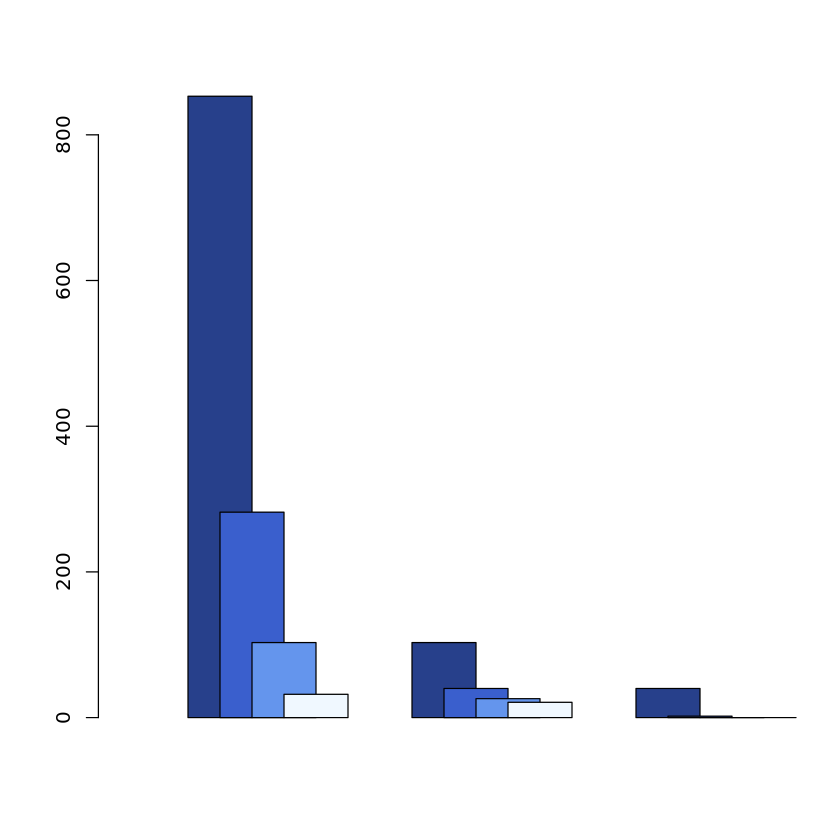

In [8]:
options(repr.plot.width = 7, repr.plot.height = 7)
bars <- c(nrow(vd[vd$day > 0.1,]), nrow(vd[vd$day > 0.2,]), nrow(vd[vd$day > 0.3,]),nrow(vd[vd$day > 0.4,]),
         nrow(vd[vd$donor_long_id > 0.1,]), nrow(vd[vd$donor_long_id > 0.2,]), nrow(vd[vd$donor_long_id > 0.3,]),
          nrow(vd[vd$donor_long_id > 0.4,]),
         nrow(vd[vd$experiment > 0.1,]), nrow(vd[vd$experiment > 0.2,]), nrow(vd[vd$experiment > 0.3,]),
          nrow(vd[vd$experiment > 0.4,]))


my.xlim = c(0, 850)
my.ylim = c(0,10)
my.space = c(1, -0.5, -0.5, -0.5, 1, -0.5, -0.5, -0.5, 1, -0.5, -0.5, -0.5)

# opar <- par(lwd = 5)
barplot(as.numeric(bars), 
#         border = c("dodgerblue4","dodgerblue","cornflowerblue","aliceblue",
#                 "dodgerblue4","dodgerblue","cornflowerblue","aliceblue",
#                 "dodgerblue4","dodgerblue","cornflowerblue","aliceblue"),
        col = c("royalblue4","royalblue3","cornflowerblue","aliceblue",
                "royalblue4","royalblue3","cornflowerblue","aliceblue",
                "royalblue4","royalblue3","cornflowerblue","aliceblue"),
        xlim = my.ylim, ylim = my.xlim, space = my.space, ylab = "")#, 
#         width = 0.5, xlab = "% eQTLs overlapping H3K27ac", horiz = TRUE, las = 1)


In [9]:
bars <- c(nrow(vd[vd$day > 0.1,]), nrow(vd[vd$day > 0.2,]), nrow(vd[vd$day > 0.3,]),nrow(vd[vd$day > 0.4,]),
         nrow(vd[vd$donor_long_id > 0.1,]), nrow(vd[vd$donor_long_id > 0.2,]), nrow(vd[vd$donor_long_id > 0.3,]),
          nrow(vd[vd$donor_long_id > 0.4,]),
         nrow(vd[vd$experiment > 0.1,]), nrow(vd[vd$experiment > 0.2,]), nrow(vd[vd$experiment > 0.3,]),
          nrow(vd[vd$experiment > 0.4,]))


my.xlim = c(0, 850)
my.ylim = c(0,10)
my.space = c(1, -0.5, -0.5, -0.5, 1, -0.5, -0.5, -0.5, 1, -0.5, -0.5, -0.5)

In [11]:
svg(filename="/hps/nobackup/stegle/users/acuomo/all_scripts/sc_endodiff/main_figures/figure1B.svg", 
    width=7, 
    height=7, 
    pointsize=12)



# opar <- par(lwd = 5)
barplot(as.numeric(bars), 
#         border = c("dodgerblue4","dodgerblue","cornflowerblue","aliceblue",
#                 "dodgerblue4","dodgerblue","cornflowerblue","aliceblue",
#                 "dodgerblue4","dodgerblue","cornflowerblue","aliceblue"),
        col = c("royalblue4","royalblue3","cornflowerblue","aliceblue",
                "royalblue4","royalblue3","cornflowerblue","aliceblue",
                "royalblue4","royalblue3","cornflowerblue","aliceblue"),
        xlim = my.ylim, ylim = my.xlim, space = my.space, ylab = "")#, 

dev.off()

png 
  2

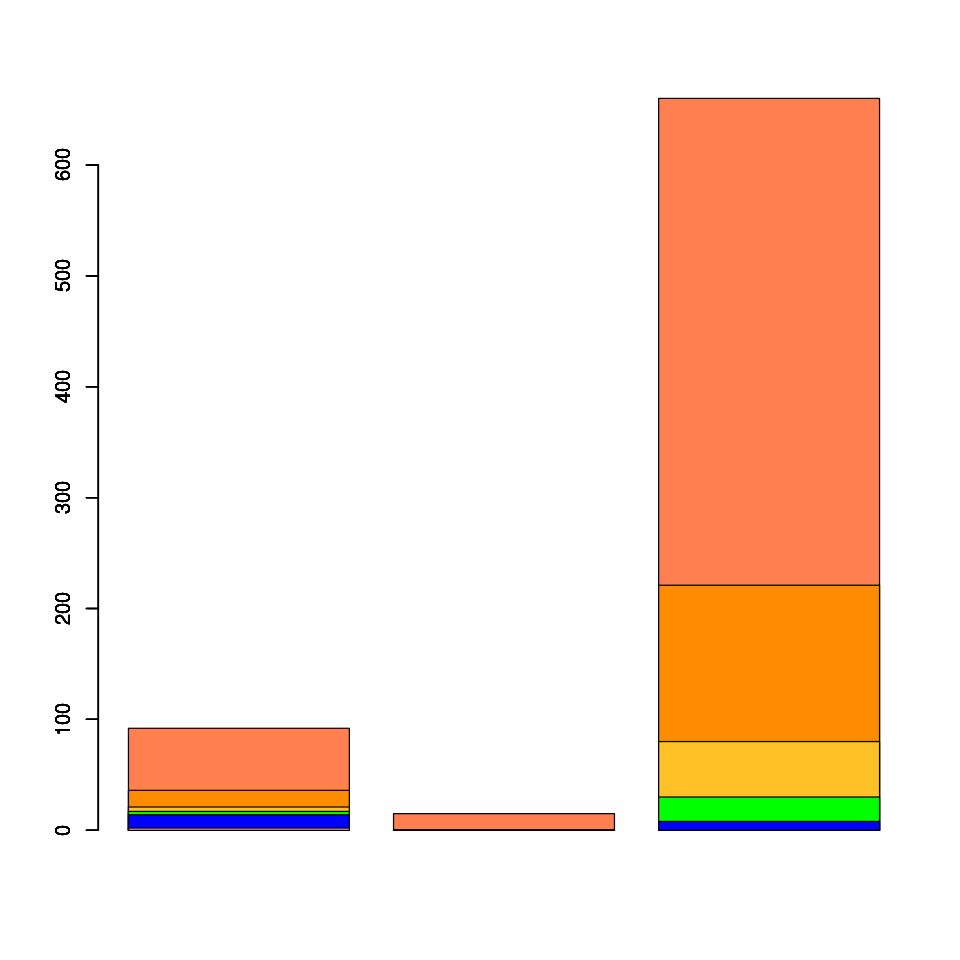

In [58]:
options(repr.plot.width = 8, repr.plot.height = 8)
col_list = c("coral","darkorange","goldenrod1","green","blue","pink")
# barplot(c(243,200,1354), col = c(col_list[1],col_list[1],col_list[1]), axes = 3)
barplot(c(92,15,660), col = c(col_list[1],col_list[1],col_list[1]), axes = 3)
barplot(c(36,0,221), col = c(col_list[2],col_list[2],col_list[2]), add = T)
barplot(c(21,0,80), col = c(col_list[3],col_list[3],col_list[3]), add = T)
barplot(c(17,0,30), col = c(col_list[4],col_list[4],col_list[4]), add = T)
barplot(c(14,0,8), col = c(col_list[5],col_list[5],col_list[5]), add = T)
barplot(c(2,0,0), col = c(col_list[6],col_list[6],col_list[6]), add = T)

In [89]:
options(repr.plot.width = 8, repr.plot.height = 8)
col_list = c("firebrick","coral","darkorange","goldenrod1","green","blue","pink","purple","pink","white","white")
df_donor = data.frame(n_genes = c(243,92,36,21,17,14,9,2,2,0,0), 
                      col = col_list, perc = c(5,10,20,30,40,50,60,70,80,90,100))
df_expt = data.frame(n_genes = c(200,15,0,0,0,0,0,0,0,0,0), 
                     col = col_list, perc = c(5,10,20,30,40,50,60,70,80,90,100))
df_day = data.frame(n_genes = c(1354,660,221,80,30,8,1,0,0,0,0), 
                    col = col_list, perc = c(5,10,20,30,40,50,60,70,80,90,100))

In [90]:
head(df_donor)

n_genes,col,perc
243,firebrick,5
92,coral,10
36,darkorange,20
21,goldenrod1,30
17,green,40
14,blue,50


In [100]:
p = ggplot(df_donor, aes(x = perc, y = n_genes))
p = p + geom_bar(stat = "identity", fill = df_donor$col)
p = p + geom_line(col = "darkblue", lty = "dashed")
p1 = p + xlab("% variance explained by cell line") + ylab("# genes") 
# p1 = p1 + ylim(c(0,max(df_day$n_genes)))
p = ggplot(df_expt, aes(x = perc, y = n_genes))
p = p + geom_bar(stat = "identity", fill = df_expt$col)
p = p + geom_line(col = "darkblue", lty = "dashed")
p2 = p + xlab("% variance explained by experiment") + ylab("# genes") 
# p2 = p2 + ylim(c(0,max(df_day$n_genes)))
p = ggplot(df_day, aes(x = perc, y = n_genes))
p = p + geom_bar(stat = "identity", fill = df_day$col)
p = p + geom_line(col = "darkblue", lty = "dashed")
p3 = p + xlab("% variance explained by day") + ylab("# genes") 
# p3 = p3 + ylim(c(0,max(df_day$n_genes)))
options(repr.plot.width = 10, repr.plot.height = 4)
# plot_grid(p1, p2, p3, ncol = 3)

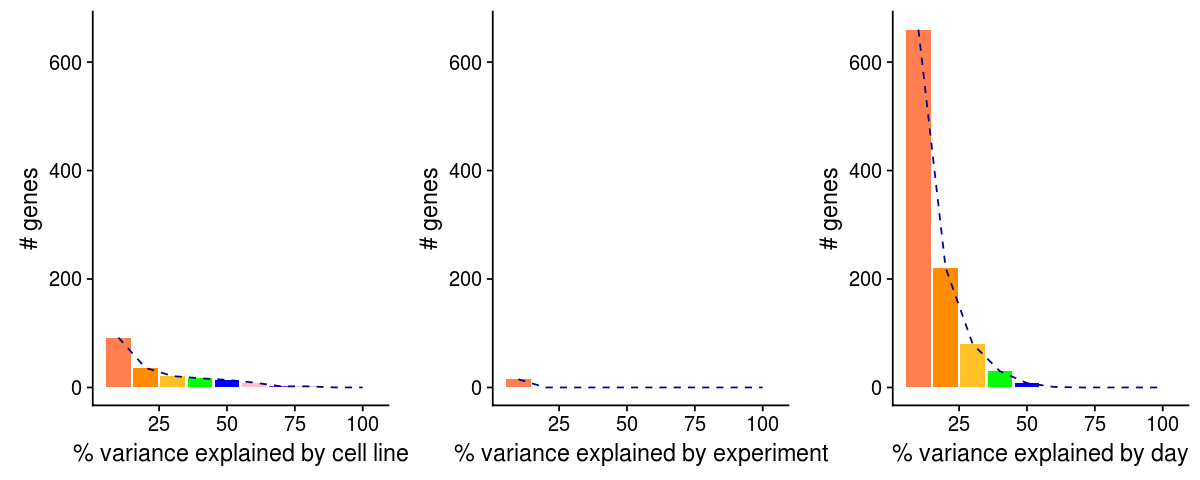

In [98]:
p = ggplot(df_donor[df_donor$perc > 5,], aes(x = perc, y = n_genes))
p = p + geom_bar(stat = "identity", fill = df_donor[df_donor$perc > 5,]$col)
p = p + geom_line(col = "darkblue", lty = "dashed")
p1 = p + xlab("% variance explained by cell line") + ylab("# genes") + ylim(c(0,max(df_day[df_day$perc>5,"n_genes"])))
p = ggplot(df_expt[df_expt$perc > 5,], aes(x = perc, y = n_genes))
p = p + geom_bar(stat = "identity", fill = df_expt[df_expt$perc > 5,]$col)
p = p + geom_line(col = "darkblue", lty = "dashed")
p2 = p + xlab("% variance explained by experiment") + ylab("# genes") + ylim(c(0,max(df_day[df_day$perc>5,"n_genes"])))
p = ggplot(df_day[df_day$perc > 5,], aes(x = perc, y = n_genes))
p = p + geom_bar(stat = "identity", fill = df_day[df_day$perc > 5,]$col)
p = p + geom_line(col = "darkblue", lty = "dashed")
p3 = p + xlab("% variance explained by day") + ylab("# genes") + ylim(c(0,max(df_day[df_day$perc>5,"n_genes"])))
options(repr.plot.width = 10, repr.plot.height = 4)
plot_grid(p1, p2, p3, ncol = 3)

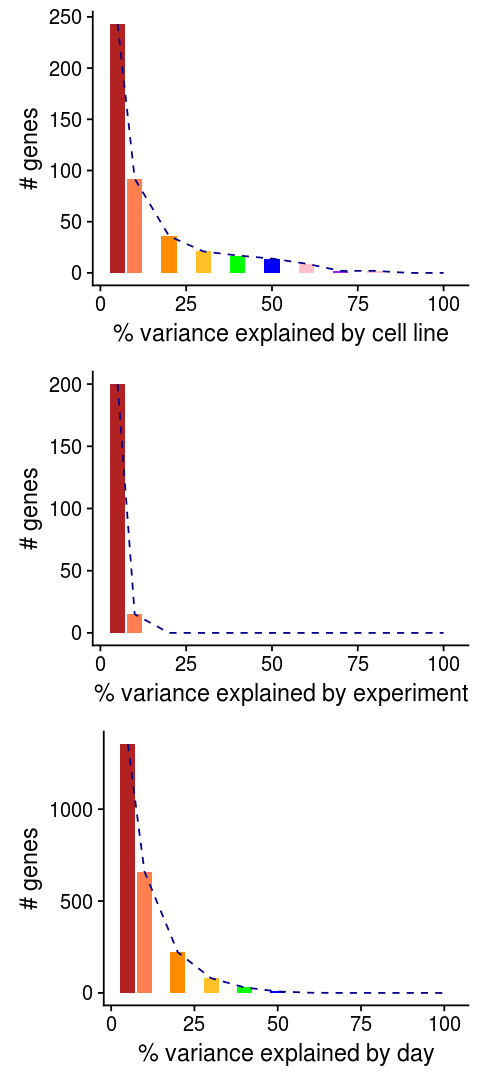

In [102]:
options(repr.plot.width = 4, repr.plot.height = 9)
plot_grid(p1,p2,p3,ncol = 1)

In [16]:
x = seq(0,1,0.001)
y_residuals <- c()
y_time_point <- c()
y_cell_line <- c()
y_experiment <- c()
k = 1
for (i in x){
#     print(i)
    y_residuals[k] <- nrow(vd[vd$residual > i,])
    y_time_point[k] <- nrow(vd[vd$day > i,])
    y_cell_line[k] <- nrow(vd[vd$donor_long_id > i,])
    y_experiment[k] <- nrow(vd[vd$experiment > i,])
    k = k + 1
}

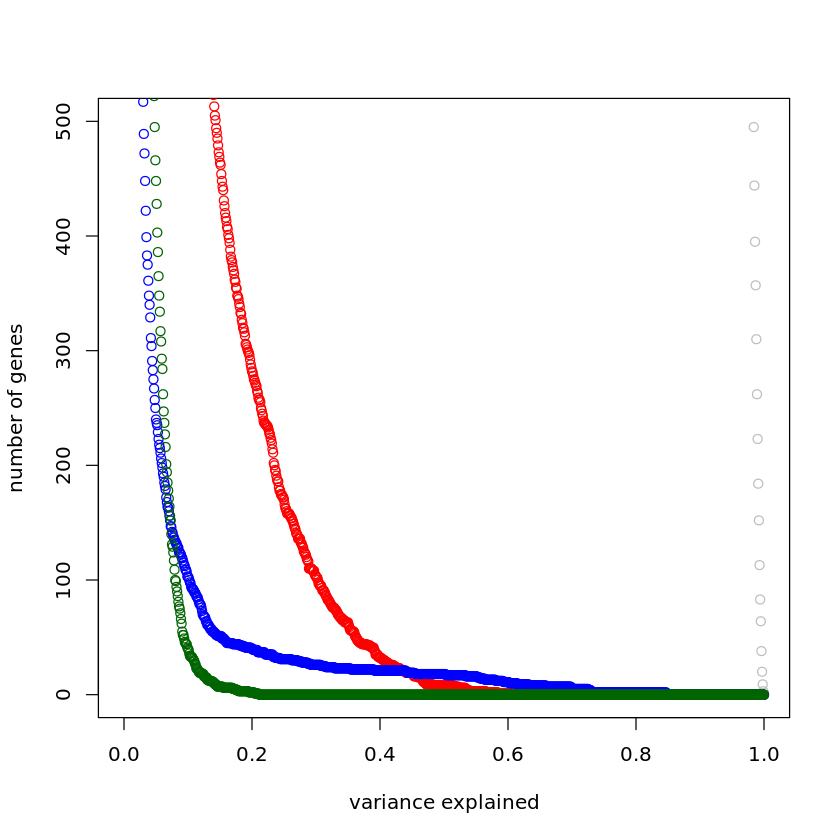

In [17]:
plot(x, y_residuals, col = "grey", ylim = c(0,500), xlab = "variance explained", ylab = "number of genes")
points(x, y_time_point, col = "red")
points(x, y_cell_line, col = "blue")
points(x, y_experiment, col = "darkgreen")

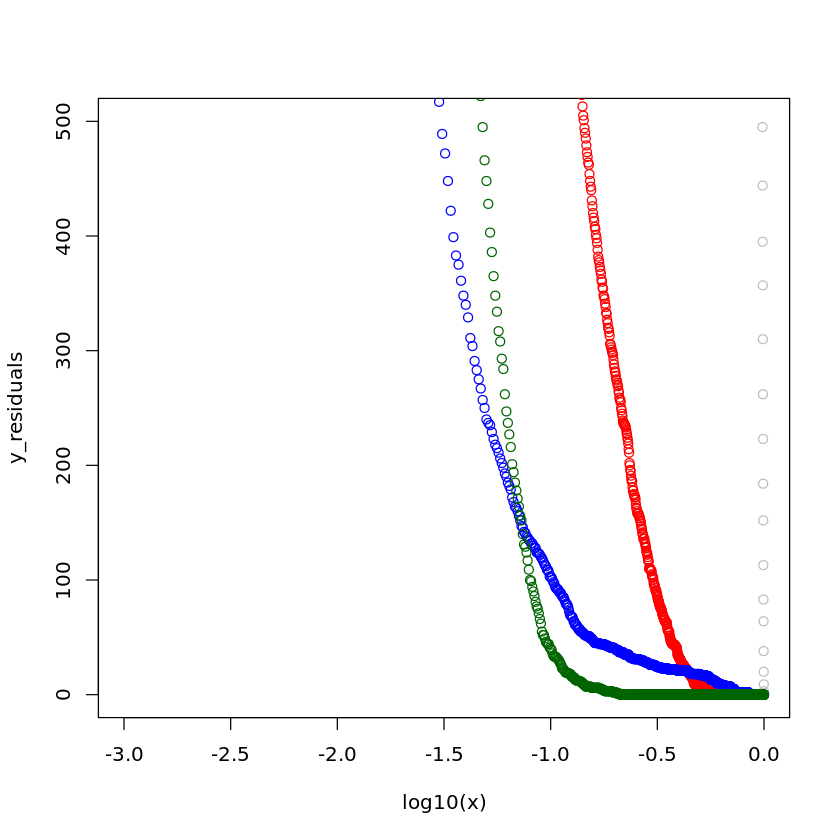

In [18]:
plot(log10(x), y_residuals, col = "grey", ylim = c(0,500))
points(log10(x), y_time_point, col = "red")
points(log10(x), y_cell_line, col = "blue")
points(log10(x), y_experiment, col = "darkgreen")